<h1 align='center'> 영상처리 프로그래밍 실습 5</h1>

<h6 align='right'> 2025. 4. 10. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 이선재  &nbsp;&nbsp;          학번:  20227123  &nbsp;&nbsp;         학과(전공):   빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 16일 (수) 오후 10:00까지 최종본을 SmartLEAD제출


# 요약


## 6주차 공부 정리

---

### 1. 언더 샘플링 (Undersampling)
- **정의**:  
  언더 샘플링은 데이터의 샘플링 빈도를 줄이는 과정으로, 데이터 크기를 축소합니다. 이미지 처리에서는 해상도를 낮추기 위해 픽셀을 선택적으로 제거하거나 평균화합니다.

- **특징**:  
  - 예: 1920x1080 이미지를 960x540으로 축소.  
  - 메모리 사용량과 계산 비용을 줄임.  
  - 단점: 세부 정보 손실 가능성(예: 텍스처, 가장자리 손실).

- **활용 사례**:  
  - 실시간 이미지 처리에서 저해상도 프리뷰 생성.  
  - 딥러닝 모델 학습 시 데이터 크기 감소.  

- **코드 예시**:  
  ```python
  import cv2
  img = cv2.imread('image.jpg')
  undersampled = cv2.resize(img, (960, 540), interpolation=cv2.INTER_AREA)
  ```

---

### 2. 선형 보간 (Linear Interpolation)
- **정의**:  
  선형 보간은 두 알려진 점 사이의 값을 직선으로 추정하는 방법입니다. 이미지 처리에서는 새로운 픽셀 값을 주변 픽셀의 가중 평균으로 계산합니다.

- **특징**:  
  - 계산이 간단하고 속도가 빠름.  
  - 확대 시 블록화된 결과(계단 현상)가 나타날 수 있음.  
  - 축소 시 비교적 부드러운 결과 제공.

- **활용 사례**:  
  - 이미지 확대/축소(OpenCV의 `cv2.INTER_LINEAR`).  
  - 신호 처리에서 데이터 간극 보간.

- **코드 예시**:  
  ```python
  import cv2
  img = cv2.imread('image.jpg')
  resized = cv2.resize(img, (800, 600), interpolation=cv2.INTER_LINEAR)
  ```

---

### 3. 에어리어 (Area Interpolation)
- **정의**:  
  에어리어 보간은 이미지 축소 시 픽셀 영역의 평균 값을 계산하여 새로운 픽셀을 생성하는 방법입니다. 주로 축소에 최적화되어 있습니다.

- **특징**:  
  - 축소 시 노이즈와 계단 현상을 줄임.  
  - 확대에는 적합하지 않음(블러링 발생).  
  - 고품질 축소 결과를 제공.

- **활용 사례**:  
  - 썸네일 생성.  
  - 고해상도 이미지를 저해상도로 변환.

- **코드 예시**:  
  ```python
  import cv2
  img = cv2.imread('image.jpg')
  thumbnail = cv2.resize(img, (100, 100), interpolation=cv2.INTER_AREA)
  ```

---

### 4. 큐빅 인터폴레이션 (Cubic Interpolation)
- **정의**:  
  큐빅 인터폴레이션은 4개의 인접 픽셀을 이용해 3차 곡선으로 새로운 픽셀 값을 계산하는 보간법입니다. 부드럽고 선명한 결과를 제공합니다.

- **특징**:  
  - 선형 보간보다 더 부드럽고 선명.  
  - 계산 비용이 높음.  
  - 확대 시 품질 우수, 단 과도한 샤프닝 가능.

- **활용 사례**:  
  - 고품질 이미지 확대.  
  - 의료 영상 처리에서 디테일 유지.

- **코드 예시**:  
  ```python
  import cv2
  img = cv2.imread('image.jpg')
  enlarged = cv2.resize(img, (2000, 1500), interpolation=cv2.INTER_CUBIC)
  ```

---

### 5. imshow 함수에 resize 기능이 있다!
- **설명**:  
  OpenCV의 `cv2.imshow()`는 직접적으로 크기 조정 기능을 제공하지 않습니다. 그러나 `cv2.resize()`로 이미지를 조정한 후 `cv2.imshow()`로 표시하거나, `cv2.resizeWindow()`로 창 크기를 조정해 비슷한 효과를 얻을 수 있습니다.

- **특징**:  
  - `cv2.imshow()`는 이미지 데이터를 화면에 렌더링.  
  - 창 크기 조정은 `cv2.resizeWindow()`로 별도 처리.  
  - 이미지 크기와 창 크기를 맞추면 사용자 경험이 향상됨.

- **활용 사례**:  
  - 이미지 처리 결과 실시간 확인.  
  - 디버깅 시 다양한 크기로 이미지 표시.

- **코드 예시**:  
  ```python
  import cv2
  img = cv2.imread('image.jpg')
  resized = cv2.resize(img, (800, 600))
  cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
  cv2.resizeWindow('Display', 800, 600)
  cv2.imshow('Display', resized)
  cv2.waitKey(0)
  ```

---

### 6. 앨리어싱 (Aliasing)
- **정의**:  
  앨리어싱은 샘플링 주기가 충분히 높지 않을 때 발생하는 왜곡 현상입니다. 이미지에서는 축소/확대 시 계단 현상(깍두기 효과)으로 나타납니다.

- **특징**:  
  - 주로 고주파 성분(세부 디테일)이 손실될 때 발생.  
  - 안티앨리어싱(예: 가우시안 블러)으로 완화 가능.  
  - 나이퀴스트 이론: 샘플링 주기가 신호 주파수의 2배 이상이어야 함.

- **활용 사례**:  
  - 그래픽 렌더링에서 부드러운 가장자리 처리.  
  - 이미지 축소 전 저주파 필터 적용.

- **코드 예시**:  
  ```python
  import cv2
  img = cv2.imread('image.jpg')
  blurred = cv2.GaussianBlur(img, (5, 5), 0)  # 앨리어싱 방지
  resized = cv2.resize(blurred, (200, 200), interpolation=cv2.INTER_AREA)
  ```

---

### 7. 브로드캐스팅이 사용 가능한 경우 3가지
- **정의**:  
  브로드캐스팅은 NumPy에서 서로 다른 크기의 배열 간 연산을 가능하게 하는 기능으로, 작은 배열을 자동 확장하여 연산을 수행합니다.

- **사용 가능한 경우**:  
  1. **스칼라 연산**: 배열과 단일 값 간 연산.  
     - 예: `arr + 5` → 스칼라 5가 배열 크기에 맞게 확장.  
  2. **차원 크기 1인 경우**: 한 배열의 차원이 1이면 다른 배열의 차원에 맞춰 확장.  
     - 예: `(3,1)` 배열과 `(3,4)` 배열 연산 → `(3,1)`이 `(3,4)`로 확장.  
  3. **차원 호환**: 작은 차원의 배열이 큰 차원의 끝부분에 맞춰질 때.  
     - 예: `(3,)` 배열과 `(2,3)` 배열 연산 → `(3,)`이 `(2,3)`으로 확장.

- **활용 사례**:  
  - 이미지 픽셀 값 일괄 조정(예: 밝기 증가).  
  - 대규모 데이터 연산 간소화.

- **코드 예시**:  
  ```python
  import numpy as np
  arr = np.array([[1, 2, 3], [4, 5, 6]])
  scalar_add = arr + 5  # 스칼라 브로드캐스팅
  col_vec = np.array([[10], [20]])
  result = arr + col_vec  # 차원 1 브로드캐스팅
  ```

---

### 8. OpenCV의 resize 함수가 제공하는 보간 방법
- **설명**:  
  OpenCV의 `cv2.resize()`는 이미지 크기 조정 시 다양한 보간법을 제공하여 품질과 속도를 조절합니다.

- **보간 방법**:  
  1. **`cv2.INTER_NEAREST`**: 최근접 이웃 보간.  
     - 가장 빠름, 단 품질 낮음(블록화).  
     - 적합: 속도가 중요한 경우.  
  2. **`cv2.INTER_LINEAR`**: 선형 보간.  
     - 속도와 품질 균형, 기본값.  
     - 적합: 일반적인 확대/축소.  
  3. **`cv2.INTER_AREA`**: 픽셀 영역 평균.  
     - 축소에 최적, 노이즈 감소.  
     - 적합: 썸네일 생성.  
  4. **`cv2.INTER_CUBIC`**: 큐빅 보간.  
     - 고품질, 확대 시 선명.  
     - 적합: 디테일 유지 필요한 경우.  
  5. **`cv2.INTER_LANCZOS4`**: Lanczos 보간.  
     - 최고 품질, 복잡한 계산.  
     - 적합: 전문 이미지 처리.

- **코드 예시**:  
  ```python
  import cv2
  img = cv2.imread('image.jpg')
  nearest = cv2.resize(img, (400, 300), interpolation=cv2.INTER_NEAREST)
  cubic = cv2.resize(img, (400, 300), interpolation=cv2.INTER_CUBIC)
  ```

---

### 9. OpenCV의 resizeWindow
- **정의**:  
  `cv2.resizeWindow(window_name, width, height)`는 OpenCV 창의 크기를 지정된 너비와 높이로 조정하는 함수입니다.

- **특징**:  
  - 창 크기를 동적으로 조정하여 이미지 표시 최적화.  
  - `cv2.WINDOW_NORMAL` 플래그와 함께 사용 시 유용.  
  - 이미지 크기와 창 크기를 일치시키면 스크롤바 없이 자연스럽게 표시.

- **활용 사례**:  
  - 크기 조정된 이미지에 맞춰 창 크기 동기화.  
  - 인터랙티브 애플리케이션에서 사용자 경험 개선.

- **코드 예시**:  
  ```python
  import cv2
  img = cv2.imread('image.jpg')
  resized = cv2.resize(img, (800, 600))
  cv2.namedWindow('Window', cv2.WINDOW_NORMAL)
  cv2.resizeWindow('Window', 800, 600)
  cv2.imshow('Window', resized)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  ```

---


# 실습

### 수업 전

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import image_tools as image_tools

print("Python version", sys.version)
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

Python version 3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]
OpenCV version 4.11.0
NumPy version 2.2.4


In [2]:
file_name = 'clock_260.jpg'
img1 = cv2.imread(file_name)
img1.shape

cv2.namedWindow('clock', cv2.WINDOW_AUTOSIZE)
cv2.imshow('clock', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
for e in dir (cv2):
    if "INTER_" in e:
        print(e)
        
# INTER_LINEAR
# INTER_LINEAR_EXACT  # 조금 더 정확한거
# INTER_MAX           # ㅇㅇ
# INTER_NEAREST
# INTER_NEAREST_EXACT

INTER_AREA
INTER_BITS
INTER_BITS2
INTER_CUBIC
INTER_LANCZOS4
INTER_LINEAR
INTER_LINEAR_EXACT
INTER_MAX
INTER_NEAREST
INTER_NEAREST_EXACT
INTER_TAB_SIZE
INTER_TAB_SIZE2


In [5]:
help(cv2.resize)

Help on built-in function resize:

resize(...)
    resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
    .   @brief Resizes an image.
    .
    .   The function resize resizes the image src down to or up to the specified size. Note that the
    .   initial dst type or size are not taken into account. Instead, the size and type are derived from
    .   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
    .   you may call the function as follows:
    .   @code
    .       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
    .       resize(src, dst, dst.size(), 0, 0, interpolation);
    .   @endcode
    .   If you want to decimate the image by factor of 2 in each direction, you can call the function this
    .   way:
    .   @code
    .       // specify fx and fy and let the function compute the destination image size.
    .       resize(src, dst, Size(), 0.5, 0.5, interpolation);
    .   @endcode
   

## 문제 1. 
2 차원 공간 상의 두 점의 좌표를 각각 $\mathbf{x}_1 = (x_1, y_1), \mathbf{x}_2 = (x_2, y_2)$라고 하자. 그러면 두 점 사이의 거리는 다음과 같다.

$$d(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$$

다음 두 점 사이의 거리를 구하는 프로그램을 작성하라.

$\mathbf{x}_1 = (1, 4), \mathbf{x}_2 = (5, 7)$

### 3가지 방법

세 가지 표현은 모두 두 점 `p1 = [1, 4]`와 `p2 = [5, 7]` 사이의 **유클리드 거리**(Euclidean distance)를 계산하지만, 사용하는 방법과 라이브러리에 차이가 있습니다. 아래에서 차이점을 설명하겠습니다.

---

#### 1. `math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)`
- **설명**: Python의 기본 `math` 모듈을 사용하여 유클리드 거리를 직접 계산합니다.
- **동작**:
  - 두 점의 x좌표 차이 `(p1[0] - p2[0])`와 y좌표 차이 `(p1[1] - p2[1])`를 각각 제곱합니다.
  - 제곱한 값들을 더한 후, `math.sqrt`로 제곱근을 구합니다.
  - 이는 유클리드 거리 공식 \( \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} \)를 그대로 구현한 것입니다.
- **특징**:
  - NumPy 같은 외부 라이브러리 없이 순수 Python으로 계산.
  - 코드가 직관적이며, 2차원 점에 특화된 구현.
  - 고차원 벡터나 배열에는 확장하려면 추가 작업 필요.
  - 소규모 계산에 적합.
- **결과**: `5.0`

---

#### 2. `np.sqrt(np.sum((p1 - p2)**2))`
- **설명**: NumPy를 사용하여 유클리드 거리를 계산합니다.
- **동작**:
  - `p1`과 `p2`를 NumPy 배열로 변환한 뒤, `p1 - p2`로 좌표 차이를 계산.
  - 차이를 제곱하고(`**2`), `np.sum`으로 모든 요소를 합산.
  - `np.sqrt`로 제곱근을 구함.
  - 유클리드 거리 공식을 NumPy 연산으로 표현한 것.
- **특징**:
  - NumPy 배열 연산을 활용하므로, 고차원 벡터나 배열에도 쉽게 확장 가능.
  - 2차원뿐만 아니라 n차원 벡터에서도 동일한 코드 사용 가능.
  - NumPy의 벡터화 연산 덕분에 대규모 데이터 처리에 효율적.
  - `np.array`로 변환해야 하므로 약간의 오버헤드가 있음.
- **결과**: `5.0`

---

#### 3. `np.linalg.norm(p1 - p2)`
- **설명**: NumPy의 `linalg.norm` 함수를 사용하여 유클리드 거리(또는 L2 노름)를 계산합니다.
- **동작**:
  - `p1 - p2`로 두 점의 차이를 구한 뒤, `np.linalg.norm`이 자동으로 유클리드 노름을 계산.
  - 내부적으로는 \( \sqrt{\sum (x_i - y_i)^2} \)를 수행.
  - NumPy가 최적화된 방식으로 계산.
- **특징**:
  - 가장 간결하고 추상화된 방법.
  - NumPy의 전용 함수로, 유클리드 거리(L2 노름)뿐만 아니라 다른 노름(L1, L∞ 등)도 계산 가능.
  - 고차원 벡터, 행렬, 텐서 등에 바로 적용 가능.
  - NumPy의 최적화로 인해 성능이 우수.
  - 코드가 간단해 실수 가능성 적음.
- **결과**: `5.0`

---

### 주요 차이점 요약
| 방법 | 라이브러리 | 코드 복잡도 | 확장성 | 최적화 | 사용 용도 |
|------|-----------|------------|--------|-------|----------|
| `math.sqrt` | `math` | 높음 | 낮음 | 낮음 | 소규모, 2차원 계산 |
| `np.sqrt(np.sum)` | NumPy | 중간 | 높음 | 중간 | 일반적인 배열 계산 |
| `np.linalg.norm` | NumPy | 낮음 | 높음 | 높음 | 고차원, 대규모 계산 |

---

#### 추가 고려사항
- **입력 형식**:
  - `math.sqrt` 방식은 리스트 인덱싱(`p1[0]`, `p1[1]`)을 직접 사용하므로, 2차원 점에만 적합.
  - NumPy 방식은 `p1`, `p2`가 리스트여도 자동으로 `np.array`로 변환되어 처리 가능.
- **성능**:
  - 소규모 데이터에서는 차이 미미.
  - 대규모 데이터나 반복 연산에서는 `np.linalg.norm`이 가장 효율적.
- **가독성**:
  - `np.linalg.norm`이 가장 간결하고 의도를 명확히 전달.
  - `math.sqrt`는 수학 공식을 그대로 보여줘 이해하기 쉬움.

---

#### 결론
- **간단한 2차원 계산** → `math.sqrt`로 충분.
- **고차원 또는 대규모 데이터** → `np.linalg.norm` 추천.
- **NumPy 사용 중이고 명시적 계산 선호** → `np.sqrt(np.sum)`도 괜찮음.

세 방법 모두 결과는 동일(`5.0`)이지만, 상황에 따라 적합한 방법을 선택하면 됩니다.

In [4]:
import math

p1 = [1,4]
p2 = [5,7]
math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

5.0

In [8]:
import numpy as np

# 두 점의 차이를 계산하고 거리 구하기
p1 = np.array([1, 4])
p2 = np.array([5, 7]) 
np.sqrt(np.sum((p1 - p2)**2))

np.float64(5.0)

In [9]:
import numpy as np

# 벡터의 유클리드 노름(거리)을 직접 계산
p1 = np.array([1, 4])
p2 = np.array([5, 7]) 
np.linalg.norm(p1 - p2)

np.float64(5.0)

## 문제 2.

'bird.png' 파일을 읽고 중앙에 영상의 정 중앙을 원의 중심으로 하고 영상의 높이의 1/3을 반지름으로 하는 원 외부의 영역을 모두 Cyan색으로 만드는 프로그램을 작성하라. 단, ndarray의 boolian indexing을 사용하여 해결하라.

#### 원 외부의 영역을 모두 Cyan색으로 만드는 방법


주어진 세 가지 방식은 모두 이미지에서 특정 중심을 기준으로 반지름 `radius`인 원의 바깥 영역을 찾아 해당 픽셀을 특정 색상(`CV2_COLOR_CYAN`)으로 채우는 작업을 수행합니다. 각 방식은 구현 방법과 효율성에서 차이가 있으며, 공통점도 존재합니다. 아래에서 각 방식의 **공통점**, **차이점**, 그리고 세부적인 특징을 자세히 설명하겠습니다.

---

#### 공통점
1. **목표**:
   - 세 방식 모두 이미지(`bird`)에서 중심 `(center_x, center_y)`을 기준으로 반지름 `radius`인 원의 **바깥쪽 픽셀**을 찾아 색상(`CV2_COLOR_CYAN`, 즉 BGR 형식의 `(255, 255, 0)`)으로 변경합니다.
   - 최종 결과는 동일: 원 안쪽은 원본 이미지 유지, 원 바깥은 청록색으로 채워짐.

2. **기본 공식**:
   - 모든 방식은 유클리드 거리 공식을 기반으로 원의 경계를 판별합니다.
   - 픽셀 `(x, y)`가 원 바깥에 있는지 확인하기 위해 다음 조건을 사용:
     \[
     (x - \text{center}_x)^2 + (y - \text{center}_y)^2 > \text{radius}^2
     \]
   - 이는 픽셀과 중심 사이의 거리가 `radius`보다 큰 경우를 의미.

3. **입력 및 출력**:
   - 입력: 이미지 `bird` (BGR 형식의 `np.uint8` 배열, 크기 `(height, width, 3)`).
   - 출력: 원본 이미지의 복사본(`img`)에 원 바깥 영역이 `CV2_COLOR_CYAN`으로 변경된 결과.

4. **색상 적용**:
   - 세 방식 모두 동일한 색상 값(`CV2_COLOR_CYAN = (255, 255, 0)`)을 적용.
   - 색상은 BGR 형식으로 OpenCV와 호환.

---

#### 차이점
각 방식은 구현 방식, 성능, 코드 가독성, 확장성 등에서 차이가 있습니다. 아래에서 방식별로 분석하고 비교합니다.

##### 1. 방식 0: `distance_from_center`를 사용한 벡터화
```python
distance_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)
mask = distance_from_center > radius
```
- **설명**:
  - NumPy 배열 연산을 사용하여 이미지의 모든 픽셀에서 중심까지의 유클리드 거리를 계산.
  - `x`와 `y`는 각각 `np.arange(height).reshape(height, 1)`와 `np.arange(width).reshape(1, width)`로 생성된 좌표 배열.
  - 거리 계산 후, `radius`보다 큰 픽셀을 `mask`로 선택.
  - 이후 `img[mask] = CV2_COLOR_CYAN` 같은 방식으로 색상 적용(가정).

- **특징**:
  - **벡터화**: NumPy의 브로드캐스팅을 활용해 모든 픽셀의 거리를 한 번에 계산.
  - **명시적 거리 계산**: `np.sqrt`를 사용해 실제 유클리드 거리를 구함.
  - **가독성**: 수학적으로 직관적이며, 거리 기반 접근법을 명확히 보여줌.
  - **메모리 사용**: `distance_from_center` 배열을 추가로 생성하므로 메모리 소모가 약간 큼.

- **장점**:
  - NumPy의 벡터화로 인해 반복문 없이 빠르게 계산.
  - 고차원 이미지나 복잡한 마스크에도 쉽게 확장 가능.
  - 거리 값을 직접 얻으므로, 추가적인 거리 기반 처리(예: 거리별 색상 변화)에 유리.

- **단점**:
  - `np.sqrt` 연산은 계산 비용이 상대적으로 높음.
  - `distance_from_center` 배열 저장으로 메모리 사용량 증가.
  - 단순히 원의 경계만 판별하려면 제곱근 계산이 불필요할 수 있음.

- **사용 예시** (완성 코드 가정):
  ```python
  img = bird.copy()
  x = np.arange(height).reshape(height, 1)
  y = np.arange(width).reshape(1, width)
  distance_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)
  mask = distance_from_center > radius
  img[mask] = CV2_COLOR_CYAN
  ```

---

##### 2. 방식 1: 반복문 사용 (촌스러움)
```python
img = bird.copy()
r2 = radius**2
for x in range(height):
    for y in range(width):
        if (x-center[0])**2 + (y-center[1])**2 > r2:
            img[x,y,:3] = CV2_COLOR_CYAN
```
- **설명**:
  - 이미지의 각 픽셀 `(x, y)`를 순회하며 중심 `(center[0], center[1])`과의 거리 제곱을 계산.
  - 제곱근(`np.sqrt`) 대신 `radius**2`와 비교하여 계산 효율성 개선.
  - 조건을 만족하는 픽셀에 직접 색상(`CV2_COLOR_CYAN`) 적용.

- **특징**:
  - **순차적 처리**: Python의 `for` 루프를 사용해 픽셀 단위로 처리.
  - **제곱 비교**: 제곱근 계산을 피하고 `(x-center[0])**2 + (y-center[1])**2 > r2`로 비교.
  - **명시적 인덱싱**: `img[x,y,:3]`로 색상 채널에 직접 접근.
  - **가독성**: 단순하지만 코드가 길고 "촌스러운" 느낌.

- **장점**:
  - 구현이 직관적이며, 초보자가 이해하기 쉬움.
  - 제곱근 연산이 없어 단일 픽셀 계산은 빠름.
  - 메모리 효율적: 추가 배열 생성 없이 바로 `img`에 쓰기.

- **단점**:
  - **성능 저하**: Python의 `for` 루프는 큰 이미지에서 매우 느림(NumPy 벡터화에 비해).
  - **확장성 낮음**: 고차원 데이터나 복잡한 조건에 적용 어려움.
  - **유연성 부족**: 특정 픽셀에만 적용하려면 루프 내 조건문 추가 필요.

---

##### 3. 방식 2: 벡터화
```python
img = bird.copy()
x = np.arange(height).reshape(height, 1)
y = np.arange(width).reshape(1, width)
idx = (x-center[0])**2 + (y-center[1])**2 > radius**2
img[idx] = CV2_COLOR_CYAN
```
- **설명**:
  - NumPy 배열 연산을 사용하여 모든 픽셀의 중심까지 거리 제곱을 계산.
  - `x`와 `y`는 좌표 배열로, 브로드캐스팅을 통해 `(height, width)` 크기의 거리 제곱 배열 생성.
  - 제곱근 없이 `radius**2`와 비교하여 마스크(`idx`) 생성.
  - 마스크를 사용해 원 바깥 픽셀에 색상 적용.

- **특징**:
  - **벡터화**: NumPy의 브로드캐스팅으로 효율적 계산.
  - **제곱 비교**: 제곱근 계산을 피하여 계산량 감소.
  - **마스크 기반**: 불리언 배열(`idx`)로 픽셀 선택.
  - **가독성**: 간결하고 현대적인 NumPy 스타일.

- **장점**:
  - NumPy 벡터화로 인해 큰 이미지에서도 빠른 성능.
  - 제곱근 연산이 없어 방식 0보다 계산 효율적.
  - 간결한 코드로 가독성과 유지보수 용이.
  - 고차원 데이터나 다른 조건으로 확장 쉬움.

- **단점**:
  - 초보자에게 브로드캐스팅 개념이 생소할 수 있음.
  - `idx` 배열 생성으로 약간의 메모리 오버헤드.
  - 방식 0처럼 실제 거리 값은 얻지 못함.

---

#### 비교 표
| 항목 | 방식 0 (distance_from_center) | 방식 1 (반복문) | 방식 2 (벡터화) |
|------|-----------------------------|----------------|----------------|
| **구현 방식** | NumPy 벡터화, 거리 계산 | Python 반복문 | NumPy 벡터화, 제곱 비교 |
| **계산** | `np.sqrt`로 실제 거리 계산 | 제곱 비교 | 제곱 비교 |
| **성능** | 빠름 (중간) | 매우 느림 | 가장 빠름 |
| **메모리** | `distance_from_center` 추가 배열 | 최소 메모리 | `idx` 불리언 배열 |
| **가독성** | 직관적, 수학적 | 단순하지만 장황 | 간결, 현대적 |
| **확장성** | 높음 (거리 기반 처리 가능) | 낮음 | 높음 (마스크 기반) |
| **적합 상황** | 거리 값 필요한 경우 | 소규모 이미지, 학습용 | 대규모 이미지, 실무용 |

---

#### 세부 비교
1. **성능**:
   - **방식 1 (반복문)**: Python 루프는 인터프리터에서 실행되므로 큰 이미지(예: 1920x1080)에서 초 단위로 느려질 수 있음.
   - **방식 0 (distance_from_center)**: NumPy의 C 기반 연산으로 빠르지만, `np.sqrt`가 계산 비용을 약간 증가시킴.
   - **방식 2 (벡터화)**: `np.sqrt` 없이 제곱 비교만 하므로 방식 0보다 빠르며, NumPy 최적화로 대규모 데이터에 적합.

2. **메모리**:
   - **방식 1**: 추가 배열 없이 `img`에 직접 쓰므로 메모리 효율적.
   - **방식 0**: `distance_from_center` (float 배열, `(height, width)`) 생성으로 메모리 사용량 큼.
   - **방식 2**: `idx` (boolean 배열, `(height, width)`) 생성, boolean은 1바이트로 효율적이지만 약간의 오버헤드.

3. **가독성 및 유지보수**:
   - **방식 1**: 코드가 명확하지만 장황하고 현대적인 NumPy 스타일과 거리가 멀음.
   - **방식 0**: 수학 공식을 그대로 반영해 이해 쉬움, 하지만 `np.sqrt`가 불필요할 수 있음.
   - **방식 2**: NumPy 사용자에게 친숙하고 간결, 실무에서 선호.

4. **확장성**:
   - **방식 1**: 다른 조건(예: 타원, 복잡한 마스크) 추가 시 루프 수정이 번거로움.
   - **방식 0**: `distance_from_center`를 활용해 거리 기반 다양한 처리 가능(예: 거리에 따라 색상 점진적 변경).
   - **방식 2**: 마스크 기반으로 조건 변경 쉬움(예: `idx = ...` 수정으로 타원 등 구현 가능).

5. **계산 효율**:
   - **방식 1**: 픽셀당 제곱 계산, 루프 오버헤드가 큼.
   - **방식 0**: 제곱 + 제곱근, `np.sqrt`가 추가 비용.
   - **방식 2**: 제곱만 계산, 가장 효율적.

---

#### 언제 어떤 방식을 사용해야 하나?
- **방식 0 (distance_from_center)**:
  - 실제 거리 값이 필요한 경우(예: 거리에 따라 색상 그라디언트 적용).
  - 코드가 수학적으로 직관적이어야 할 때(교육용, 프로토타이핑).
- **방식 1 (반복문)**:
  - 소규모 이미지(예: 100x100 이하)로 테스트할 때.
  - NumPy를 사용하지 않는 환경.
  - 알고리즘 학습용(구현 원리 이해).
- **방식 2 (벡터화)**:
  - 대규모 이미지(예: HD, 4K) 처리.
  - 실무 프로젝트에서 성능과 가독성 중요.
  - 복잡한 마스크나 조건을 추가할 가능성 있음.

---

#### 코드 통합 예시
세 방식 모두 동일한 결과를 내도록 통합된 예시입니다:
```python
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 이미지 로드 (BGR, uint8)
bird = cv2.imread('bird.png')
height, width = bird.shape[:2]
center = (width // 2, height // 2)
radius = height // 3
CV2_COLOR_CYAN = (255, 255, 0)

# 방식 0: distance_from_center
img0 = bird.copy()
x = np.arange(height).reshape(height, 1)
y = np.arange(width).reshape(1, width)
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)
mask = distance_from_center > radius
img0[mask] = CV2_COLOR_CYAN

# 방식 1: 반복문
img1 = bird.copy()
r2 = radius**2
for x in range(height):
    for y in range(width):
        if (x - center[1])**2 + (y - center[0])**2 > r2:
            img1[x, y, :3] = CV2_COLOR_CYAN

# 방식 2: 벡터화
img2 = bird.copy()
x = np.arange(height).reshape(height, 1)
y = np.arange(width).reshape(1, width)
idx = (x - center[1])**2 + (y - center[0])**2 > radius**2
img2[idx] = CV2_COLOR_CYAN

# 결과 표시
plt.figure(figsize=(15, 5))
for i, img in enumerate([img0, img1, img2], 1):
    plt.subplot(1, 3, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"방식 {i-1}")
    plt.axis('off')
plt.show()
```

---

#### 결론
- **공통점**: 모두 동일한 유클리드 거리 공식을 사용해 원 바깥을 색상으로 채움.
- **차이점**:
  - **방식 0**: 거리 계산으로 직관적이지만 `np.sqrt`로 약간 느림.
  - **방식 1**: 반복문으로 단순하지만 성능이 떨어짐.
  - **방식 2**: 벡터화로 빠르고 간결, 실무에 최적.
- **추천**: 일반적으로 **방식 2**가 성능, 가독성, 확장성 면에서 가장 적합합니다. 하지만 특정 상황(거리 값 필요, 교육용)에서는 다른 방식도 유용할 수 있습니다.

추가 질문 있으면 말씀해주세요!

In [51]:
import image_tools as image_tools

# 내 (방식1)
img = image_tools.load_image("bird.png")

# 이미지의 크기를 가져옵니다
height, width = img.shape[:2]

# 중심점과 반지름을 계산합니다
center_x, center_y = width // 2, height // 2
radius = height // 3

# 좌표 격자를 생성합니다
y, x = np.ogrid[:height, :width]

# 각 픽셀에서 중심까지의 거리를 계산합니다
distance_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)

# 원 바깥 영역에 대한 불리언 마스크를 생성합니다 (True는 원 밖의 픽셀)
mask = distance_from_center > radius

# 원본 이미지의 복사본을 만듭니다
result = img.copy()

# 원 바깥 영역을 청록색(BGR 형식: 255,255,0)으로 설정합니다
result[mask] = [255, 255, 0]

# Display the result
cv2.namedWindow('img', cv2.WINDOW_AUTOSIZE)
cv2.imshow('img', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [76]:
# 교수님꺼 (방식2)
import image_tools as image_tools

bird = image_tools.load_image('bird.png', color_channel="RGB")  # BGR로 로드
# bird = (bird * 255).astype(np.uint8)

height, width = bird.shape[:2]
CV2_COLOR_CYAN = (255,255,0)
COLOR_CYAN_BGR = (0, 255, 255)

# 최대값 확인 (디버깅용)
print("bird.max():", bird.max())  # 255 이하여야 함

# 중심과 반지름
center = (height//2, width//2)
radius = height//3
# center, radius

bird.max(): 255


In [ ]:
# 방식1 (촌스러움)
img = bird.copy()
r2 = radius**2
for x in range(height):
    for y in range(width):
        if (x-center[0])**2 + (y-center[1])**2 > r2:
            img[x,y,:3] = CV2_COLOR_CYAN

In [77]:
# 방식 2  (벡터화)
img = bird.copy()
x = np.arange(height).reshape(height, 1)
y = np.arange(width).reshape(1, width)
idx = (x-center[0])**2 + (y-center[1])**2 > radius**2
img[idx] = CV2_COLOR_CYAN

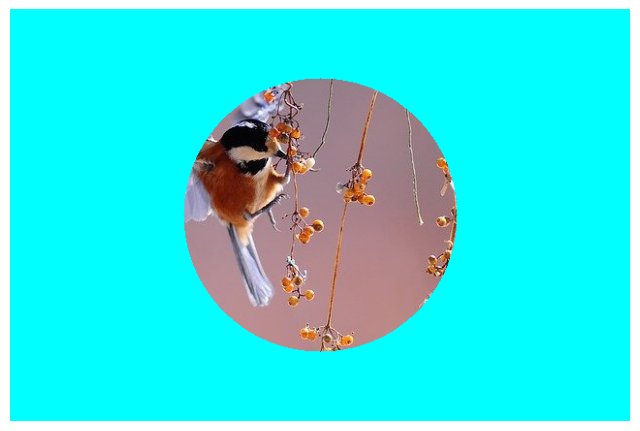

In [78]:
# BGR을 RGB로 변환 (Matplotlib용)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Matplotlib으로 이미지 표시
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)  # 수정된 이미지를 표시
plt.axis('off')
plt.show()

In [12]:
# 이런 원리로 만든 방식 2
# 
a = np.array([1,3,5])
idx = a > 1.5
a[idx] = 0
a


array([1, 0, 0])

In [40]:
aa = a.reshape(1,3)
b = np. array([1,2,3,5])
bb = b.reshape(4,1)
a.shape, aa.shape, bb

((3,),
 (1, 3),
 array([[1],
        [2],
        [3],
        [5]]))

In [45]:
np.arange(height).reshape(height, 1)

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

## 문제 3.

'bird.png' 파일을 읽고 중앙에 영상의 정 중앙을 원의 중심으로 하고 영상의 높이의 1/3을 반지름으로 하는 원 외부의 영역을 모두 Cyan색으로 만드는 프로그램을 작성하라. 단, OpenCV의 fillPoly 함수를 사용하여 해결하라.


---

#### 주의사항

**원 외부 영역 처리**:
   - `fillPoly`는 다각형 내부를 채우는 함수로, 원을 직접 채울 수는 없음.
   - 원 외부를 채우기 위해:
     - 전체 이미지를 Cyan으로 채운 후, 원 내부를 원본 이미지로 복원.
     - 또는 마스크를 생성하여 원 외부만 Cyan으로 채움.
   - 원을 다각형으로 근사하기 위해 원 위의 점들을 계산(예: 360도에 걸쳐 점 생성).

**OpenCV `fillPoly` 사용**:
   - 원을 다각형으로 표현하기 위해 점들을 생성.
   - 마스크를 사용하여 원 내부와 외부를 구분.
   - `fillPoly`로 마스크에 다각형(원)을 그리고, 이를 이용해 원 외부를 Cyan으로 채움.


---

#### 대안 접근
만약 `fillPoly`로 원 외부를 직접 채우는 대신 다른 방법을 고려한다면:
- 전체 이미지를 Cyan으로 채운 후, 원 내부를 원본으로 복원:
  ```python
  output = np.full_like(img, COLOR_CYAN_BGR)
  mask = np.zeros((height, width), dtype=np.uint8)
  cv2.fillPoly(mask, [circle_points], color=255)
  output[mask == 255] = img[mask == 255]
  ```
- 이 방식도 동일한 결과를 내지만, 메모리 사용 패턴이 약간 다름.

---

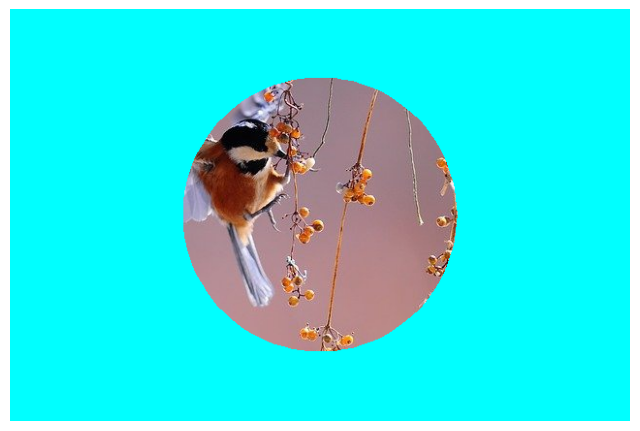

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import image_tools

# 이미지 로드
img = image_tools.load_image('bird.png')

# 이미지 크기
height, width = img.shape[:2]

# 중심과 반지름
center = (width // 2, height // 2)  # (x, y)
radius = height // 3

# Cyan 색상 (BGR)
COLOR_CYAN_BGR = (255, 255, 0)

# 원을 다각형으로 근사하기 위해 점 생성
num_points = 100  # 원을 표현할 점의 수 (다각형 정점)
theta = np.linspace(0, 2 * np.pi, num_points)
circle_points = np.array([
    [center[0] + radius * np.cos(t), center[1] + radius * np.sin(t)]
    for t in theta
], dtype=np.int32)

# 마스크 생성
mask = np.zeros((height, width), dtype=np.uint8)  # 0으로 초기화
cv2.fillPoly(mask, [circle_points], color=255)  # 원 내부를 255로 채움

# 출력 이미지 생성
output = img.copy()
# 원 외부(mask == 0)인 영역을 Cyan으로 채움
output[mask == 0] = COLOR_CYAN_BGR

# 결과 표시 (Matplotlib은 RGB를 기대)
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(output_rgb)
plt.axis('off')
plt.show()

## 문제 4.
문제 2와 3을 각각 키보드 입력을 통해서 원의 크기를 확대하거나 축소하는 프로그램을 작성하라.

In [87]:
import cv2
import numpy as np
import image_tools

# 이미지 로드
img = image_tools.load_image('bird.png')
if img is None:
    raise FileNotFoundError("이미지 파일 'bird.png'를 찾을 수 없습니다.")

# image_tools.load_image가 0~1 float 반환 가정
# img = (img * 255).astype(np.uint8)  # 0~1 float → 0~255 uint8

# 이미지 크기
height, width = img.shape[:2]

# 중심점
center_x, center_y = width // 2, height // 2

# 초기 반지름
radius = height // 3

# 반지름 변경 단위
radius_step = 10  # 키 입력당 반지름 증가/감소 픽셀

# 반지름 범위 제한
min_radius = 0
max_radius = int(np.sqrt(height**2 + width**2))  # 이미지 대각선 길이

# OpenCV 창 이름
window_name = 'Circle Adjustment'

def update_image(radius):
    """주어진 반지름으로 이미지를 업데이트하고 표시"""
    # 좌표 격자 생성
    y, x = np.ogrid[:height, :width]

    # 각 픽셀에서 중심까지의 거리 계산
    distance_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)

    # 원 바깥 영역 마스크 (True: 원 밖)
    mask = distance_from_center > radius

    # 출력 이미지 생성
    result = img.copy()
    result[mask] = [255, 255, 0]  # Cyan (BGR)

    # 이미지 표시
    cv2.imshow(window_name, result)

# 초기 이미지 표시
update_image(radius)

while True:
    key = cv2.waitKey(0) & 0xFF  # 키 입력 대기
    if key == ord('+') or key == ord('w'):  # 확대
        radius = min(radius + radius_step, max_radius) #
        update_image(radius)
    elif key == ord('-') or key == ord('s'):  # 축소
        radius = max(radius - radius_step, min_radius)
        update_image(radius)
    elif key == ord('q') or key == 27:  # 종료 (q 또는 ESC)
        break

# 창 닫기
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import image_tools

# 이미지 로드
img = image_tools.load_image('bird.png')

# 이미지 크기
height, width = img.shape[:2]

# 중심
center = (width // 2, height // 2)  # (x, y)

# 초기 반지름
radius = height // 3

# Cyan 색상 (BGR)
COLOR_CYAN_BGR = (255, 255, 0)

# 반지름 변경 단위
radius_step = 10  # 키 입력당 반지름 증가/감소 픽셀

# 반지름 범위 제한
min_radius = 0
max_radius = int(np.sqrt(height**2 + width**2))  # 이미지 대각선 길이

# OpenCV 창 이름
window_name = 'Circle Adjustment'

def update_image(radius):
    """주어진 반지름으로 이미지를 업데이트하고 표시"""
    # 원을 다각형으로 근사하기 위해 점 생성
    num_points = 100  # 원을 표현할 점의 수
    theta = np.linspace(0, 2 * np.pi, num_points)
    circle_points = np.array([
        [center[0] + radius * np.cos(t), center[1] + radius * np.sin(t)]
        for t in theta
    ], dtype=np.int32)

    # 마스크 생성
    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.fillPoly(mask, [circle_points], color=255)  # 원 내부를 255로 채움

    # 출력 이미지 생성
    output = img.copy()
    output[mask == 0] = COLOR_CYAN_BGR  # 원 외부 Cyan으로 채움

    # 이미지 표시
    cv2.imshow(window_name, output)

# 초기 이미지 표시
update_image(radius)

while True:
    key = cv2.waitKey(0) & 0xFF  # 키 입력 대기
    if key == ord('+') or key == ord('w'):  # 확대
        radius = min(radius + radius_step, max_radius) # 최대치와 비교
        update_image(radius)
    elif key == ord('-') or key == ord('s'):  # 축소
        radius = max(radius - radius_step, min_radius) # 최소치와 비교
        update_image(radius)
    elif key == ord('q') or key == 27:  # 종료 (q 또는 ESC)
        break

# 창 닫기
cv2.destroyAllWindows()

## OpenCV의 resize 함수가 제공하는 보간 방법
- INTER_NEAREST: 최근접(nearest-neighbor) 보간. 처리 시간이 가장 짧음.
- INTER_LINEAR: 양방향 선형(bilinear) 보간, 기본값 
- INTER_AREA: 화소 영역의 관계를 이용한 리샘플링. 영상 축소에 주로 사용되고, 영상 확대에 사용하면 INTER_NEAREST 방법과 유사한 효과
- INTER_CUBIC: 4x4 영역에서 양방향 cubic spline 보간.
- INTER_LANCZOS4: 8x8 영역에서 Lanczos 보간. 처리 시간이 가장 느림.

## 문제 5

'clock_130.jpg' 영상 파일을 읽고, OpenCV의 윈도우를 만들어 영상을 표시하고, 마우스 입력 또는 키보드 입력을 사용하여 영상을 확대하거나 축소하는 프로그램을 작성하라.


---

### 🔍 `update_image(scale)` 함수 설명

```python
def update_image(scale):
    """주어진 스케일로 이미지 크기 조정 후 표시"""
```

- **목적**: 현재 스케일(`scale`) 값에 따라 이미지를 확대/축소하여 화면에 보여주는 함수

#### ✅ 단계별 설명

1. **원본 이미지 크기 추출**
   ```python
   height, width = img.shape[:2]
   ```
   - 이미지의 세로/가로 픽셀 수를 얻는다.

2. **스케일에 맞는 새 크기 계산**
   ```python
   new_height = int(height * scale)
   new_width = int(width * scale)
   ```
   - 예: `scale = 2.0`이면 가로/세로가 2배로 확대됨

3. **너무 작으면 생략**
   ```python
   if new_height < 1 or new_width < 1:
       return
   ```
   - 이미지가 픽셀 1개 이하로 축소되는 경우 표시하지 않음

4. **이미지 리사이즈**
   ```python
   resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
   ```
   - 보간법(`INTER_LINEAR`)을 사용해 자연스럽게 리사이즈

5. **OpenCV 창도 함께 리사이즈**
   ```python
   cv2.resizeWindow(window_name, new_width, new_height)
   ```
   - 실제로 **화면에 보이는 창 크기**도 새 이미지 크기에 맞춰 조절 (❗확대 효과의 핵심)

6. **창에 이미지 출력**
   ```python
   cv2.imshow(window_name, resized_img)
   ```

---

### 🖱 `mouse_callback(event, x, y, flags, param)` 함수 설명

```python
def mouse_callback(event, x, y, flags, param):
    """마우스 이벤트 처리"""
```

- **목적**: 마우스 휠 이벤트를 감지하여 `scale`을 조정하고 이미지를 다시 업데이트

#### ✅ 단계별 설명

1. **글로벌 변수 `scale` 사용**
   ```python
   global scale
   ```

2. **마우스 휠 이벤트인지 확인**
   ```python
   if event == cv2.EVENT_MOUSEWHEEL:
   ```

3. **휠 방향에 따라 스케일 조정**
   ```python
   if flags > 0:
       scale = min(scale + scale_step, max_scale)
   elif flags < 0:
       scale = max(scale - scale_step, min_scale)
   ```
   - `flags > 0`: 휠 위로 → 확대  
   - `flags < 0`: 휠 아래로 → 축소  
   - `min()` / `max()` 사용으로 설정한 범위 안에서만 변화

4. **변경된 스케일 출력**
   ```python
   print(f"Scale: {scale:.1f}")
   ```

5. **화면 이미지 업데이트**
   ```python
   update_image(scale)
   ```

---

In [6]:
import cv2
import numpy as np
import image_tools

# 이미지 로드
img = image_tools.load_image('clock_130.jpg')

# 초기 스케일
scale = 3.0
min_scale = 0.1
max_scale = 10.0
scale_step = 0.3  # 스케일 변경 단위

# OpenCV 창 설정
window_name = 'Image Zoom'
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)

def update_image(scale):
    """주어진 스케일로 이미지 크기 조정 후 표시"""
    height, width = img.shape[:2]
    new_height = int(height * scale)
    new_width = int(width * scale)

    if new_height < 1 or new_width < 1:
        return

    resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    # 이 줄 추가: 창 크기를 이미지 크기에 맞게 변경
    cv2.resizeWindow(window_name, new_width, new_height)

    cv2.imshow(window_name, resized_img)


def mouse_callback(event, x, y, flags, param):
    """마우스 이벤트 처리"""
    global scale
    if event == cv2.EVENT_MOUSEWHEEL:
        if flags > 0:  # 휠 업 (확대)
            scale = min(scale + scale_step, max_scale)
        elif flags < 0:  # 휠 다운 (축소)
            scale = max(scale - scale_step, min_scale)
        print(f"Scale: {scale:.1f}")
        update_image(scale)

# 마우스 콜백 등록
cv2.setMouseCallback(window_name, mouse_callback)

# 초기 이미지 표시
update_image(scale)

print("조작 방법:")
print("  마우스 휠 업 또는 '+'/'w': 확대")
print("  마우스 휠 다운 또는 '-'/'s': 축소")
print("  'q' 또는 ESC: 종료")

while True:
    key = cv2.waitKey(0) & 0xFF
    if key == ord('+') or key == ord('w'):  # 확대
        scale = min(scale + scale_step, max_scale)
        print(f"Scale: {scale:.1f}")
        update_image(scale)
    elif key == ord('-') or key == ord('s'):  # 축소
        scale = max(scale - scale_step, min_scale)
        print(f"Scale: {scale:.1f}")
        update_image(scale)
    elif key == ord('q') or key == 27:  # 종료
        break

# 창 닫기
cv2.destroyAllWindows()

조작 방법:
  마우스 휠 업 또는 '+'/'w': 확대
  마우스 휠 다운 또는 '-'/'s': 축소
  'q' 또는 ESC: 종료
Scale: 3.3
Scale: 3.6
Scale: 3.3
Scale: 3.0
Scale: 2.7
Scale: 3.0
Scale: 3.3
Scale: 3.6
Scale: 3.9
Scale: 3.6
Scale: 3.3
Scale: 3.0
Scale: 3.3
Scale: 3.0
Scale: 2.7
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.1
Scale: 2.4
Scale: 2.7
Scale: 2.4
Scale: 2.1
Scale: 2.4
Scale: 2.1
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 3.3
Scale: 3.6
Scale: 3.3
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 3.3
Scale: 3.6
Scale: 3.3
Scale: 3.0
Scale: 2.7
Scale: 3.0
Scale: 3.3
Scale: 3.0
Scale: 2.7
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 3.3
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 3.3
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
Scale: 3.3
Scale: 3.0
Scale: 2.7
Scale: 2.4
Scale: 2.7
Scale: 3.0
S